<a href="https://colab.research.google.com/github/kojeda603/ciencia_datos_2025/blob/main/09_2_EDA_TABAJO_EN_CLASE%2BTAREA%2BAnalisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pasos del EDA

1. Realizar un analisis descriptivo de las variables
2. Rea ajustar tipos de varibles que no sean consitentes en el momento de realizar las operaciones
3. detectar datos ausentes y tratarlos
4. identififcar datos atipicos y tratarlos para mitigar la distorsión de futuros analisis estadisticos.
5. Realizar un examen númerico entre variabkes analizadas determinando su grado de correlación

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/intro DS/titanic-train.csv')

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Diccionario de variables del dataset Titanic

 Survived: 1 = Sobrevive, 0 = No sobrevive

 sibsp: Número de hermanos o esposos a bordo

 parch: Número de padres o hijos a bordo

 ticket: Número del tiquete

 embarked: Puerto de embarque
              S: Southampton
              C: Cherbourg
              Q: Queenstown
              
 sex: male/female

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##1. Analisis descriptivo
Tomar cada una de las caracteristicas y analizarla

In [83]:
def bar_char(feature):
  servived=df[df['Survived']==1][feature].value_counts()
  dead=df[df['Survived']==0][feature].value_counts()
  test=pd.DataFrame([servived,dead])
  test.index=['Survived','Dead']
  test.plot(kind='bar',stacked=True,figsize=(10,5))

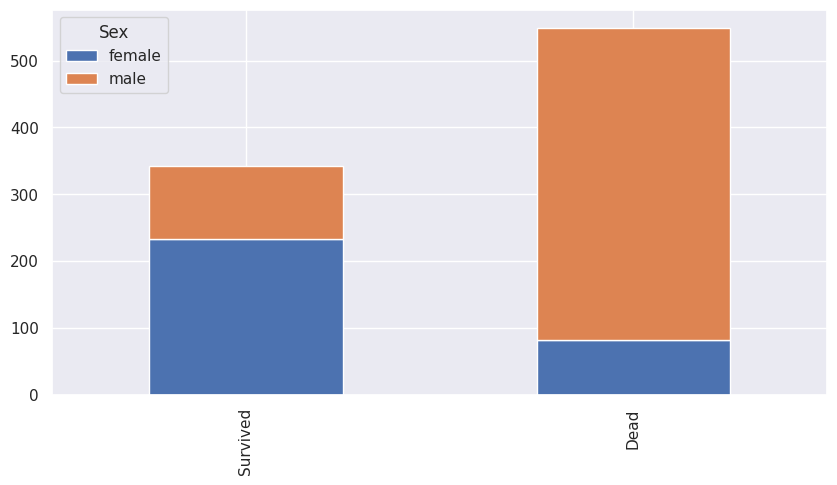

In [84]:
bar_char('Sex')

las **mujeres** mustraron mayor probabilidad de supervivencia (casi 60%) en comparacion con los hombres

In [85]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

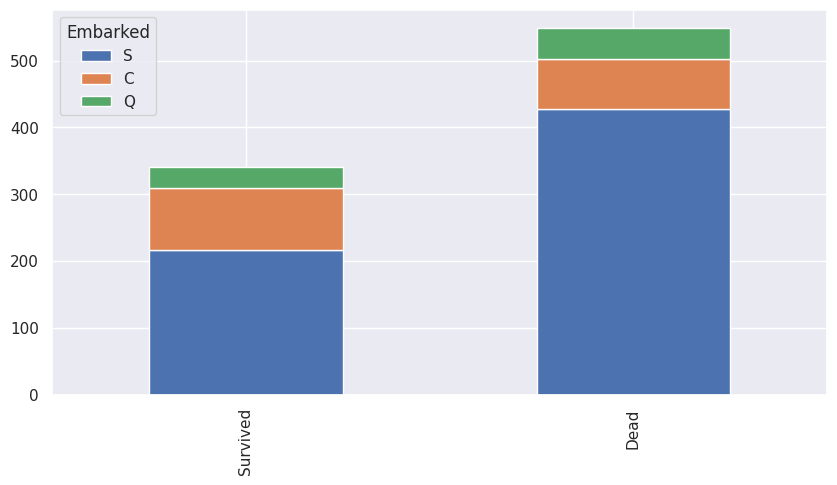

In [86]:
bar_char("Embarked")

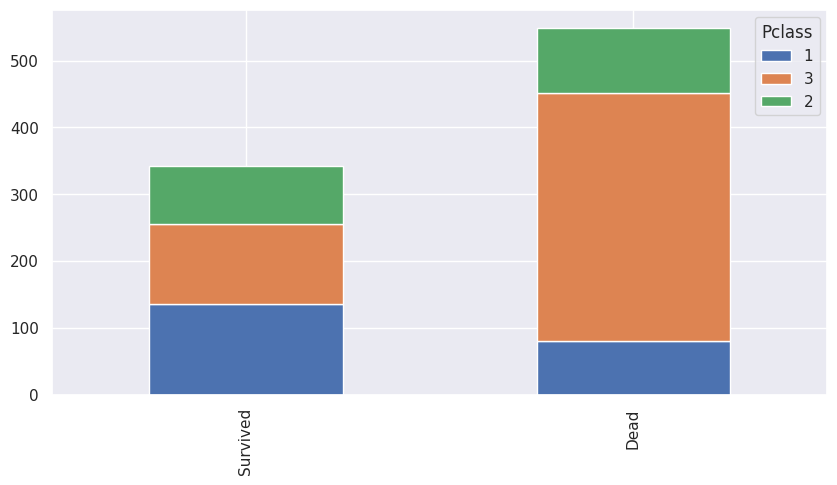

In [87]:
bar_char("Pclass")

Pclass 1 tiene mayor probabilidad de sobrevivir que Pclass 3

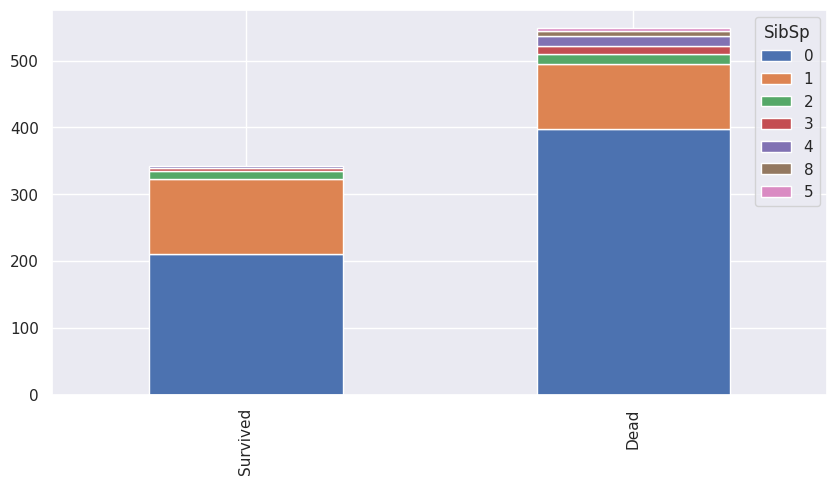

In [88]:
bar_char("SibSp")

Las personas solteras presentan menor problabilidad de supervivencia  en comparacion con aquellas casadas o con familia

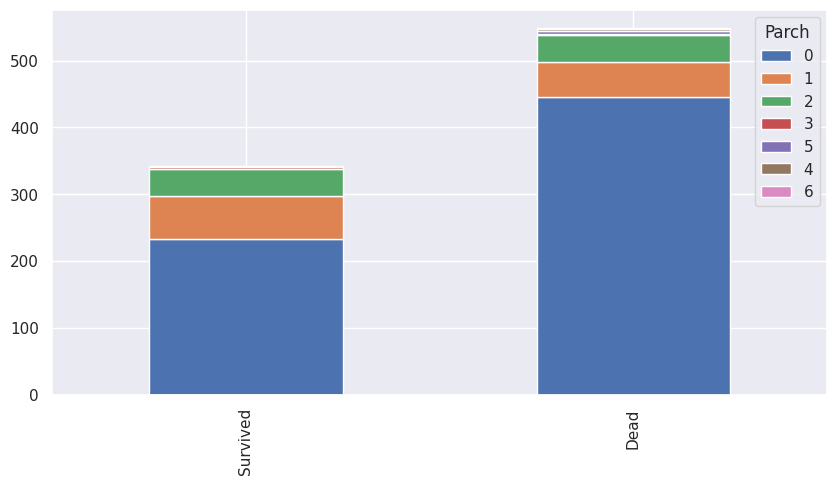

In [89]:
bar_char("Parch")

La grafica muestra que la probabilidad de supervivencia aumentaba si tenias entre 1 y 3 hijos, disminuye si eres soltero o con mas de 3 hijos

##Ingenieria de caracteristicas

Es el proceso de usar el dominio del conocimento para crear nuevas caracteristicas (feature vectors) que logre que los algoritmos de ML funcionen adecuadamente

In [90]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
668,669,0,3,"Cook, Mr. Jacob",male,43.0,0,0,A/5 3536,8.0500,NaN,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S


2. Creando feature vectors

In [91]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)
  return titles

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-4157432162.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)


In [92]:
df['Title']=extract_title(df)

In [93]:
df['Title'].sample(15)

,Title
443,Ms
173,Mr
889,Mr
888,Miss
13,Mr
679,Mr
842,Miss
737,Mr
2,Miss
120,Mr


In [94]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


2.1 Creando un mapeo de tiitulos
Renplazar
  Mr=0
  Miss=1
  Mrs=2
  Otros=3

In [95]:
def replace_title(data):
  title_mapping={"Mr":"Señor","Miss":"Señorita","Mrs":"Señora"}
  data['Title']=data['Title'].map(title_mapping).fillna("Otros")
  return data

In [96]:
df=replace_title(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor


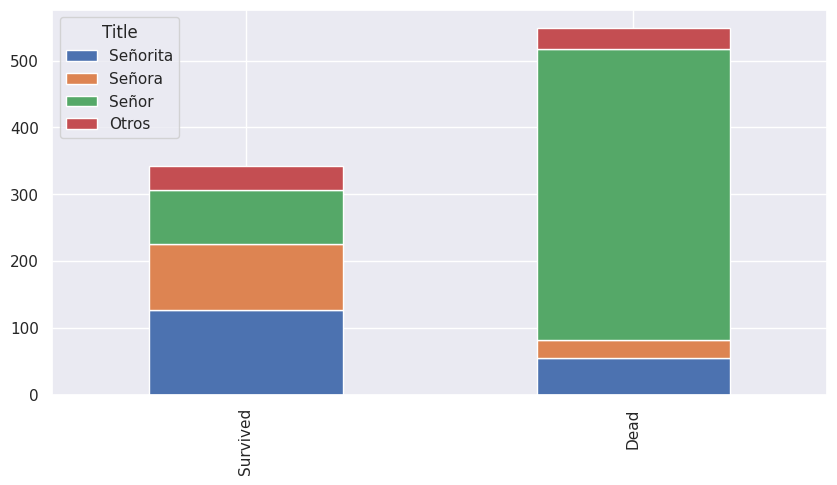

In [97]:
bar_char("Title")

In [98]:
#Eliminar informacion innecesaria

df.drop(['Name',"Cabin"],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Señor
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Señora
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Señorita
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Señora
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Señor


In [99]:
#2.2 Reparando la edad
title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
Otros,20.430161
Señor,32.368090
Señora,35.898148
Señorita,21.773973


In [100]:
df["Age"]=df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)

In [101]:
df[["Title","Age"]].head(10)

,Title,Age
0,Señor,22.00000
1,Señora,38.00000
2,Señorita,26.00000
3,Señora,35.00000
4,Señor,35.00000
5,Señor,32.36809
6,Señor,54.00000
7,Otros,2.00000
8,Señora,27.00000
9,Señora,14.00000


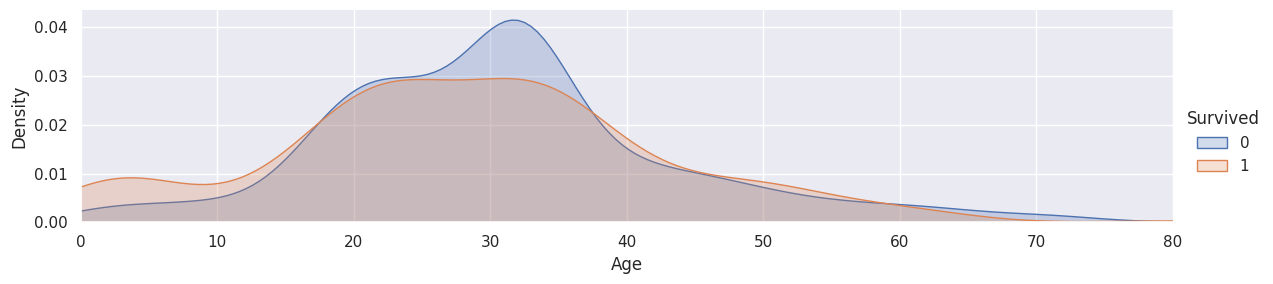

In [102]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.show()

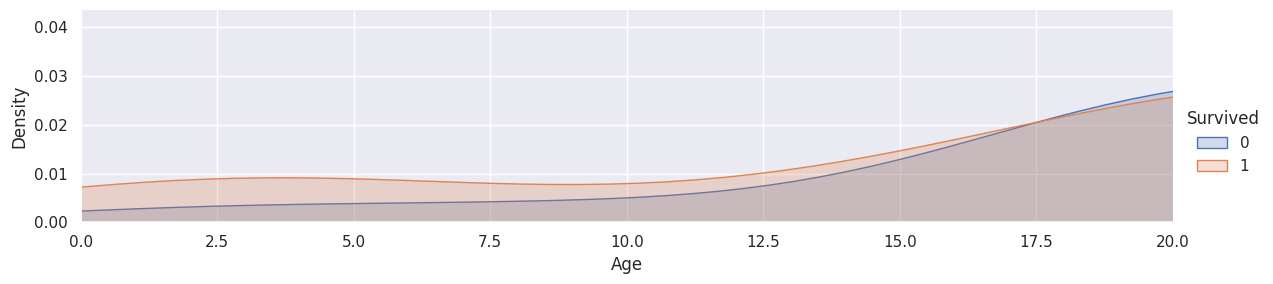

In [103]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()

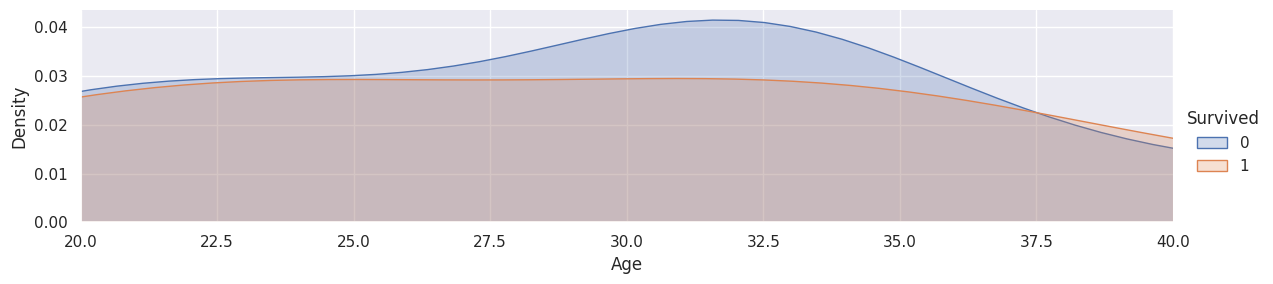

In [104]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(20,40)
plt.show()

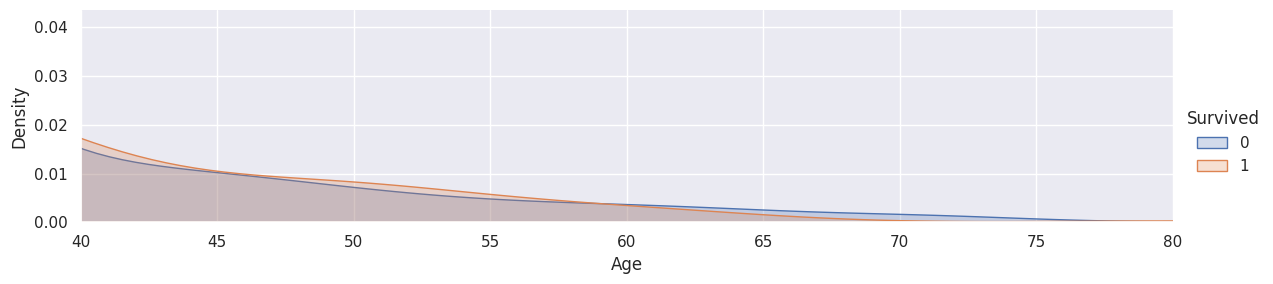

In [105]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(40,)
plt.show()

## 2.4 Binning
Convertr una variable numerica a categorica, en ese caso, la edad Mapear el feature vector



*   Niños:0
*   Joven:1
*   Adulto:3
*   Edad Madura:4
*   Edad avanzada:5




In [106]:
df["Age_category"]=pd.cut(df["Age"],bins=[0,16,26,36,62,float("inf")],labels=["Niños","Joven","Adulto","Edad Madura","Edad avanzada"],right=False)

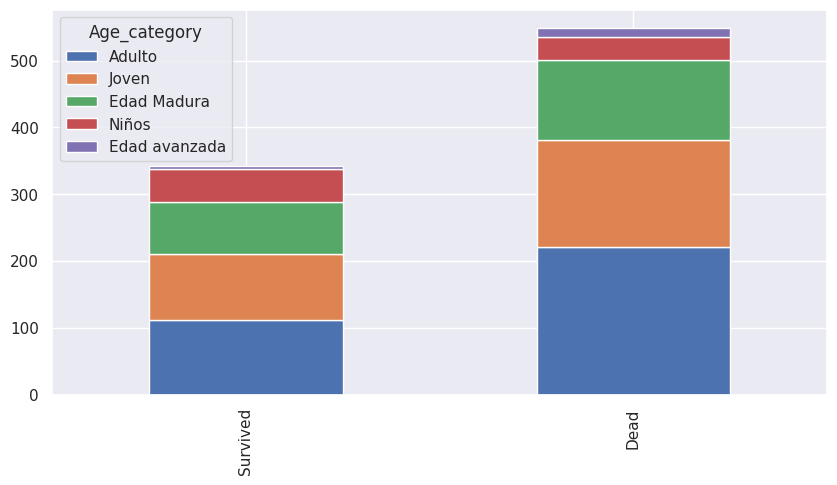

In [107]:
bar_char("Age_category")

In [108]:
df["Fare_category"]=pd.cut(df["Fare"],bins=[0,25,50,100,200,float("inf")],labels=["0-25","25-50","50-100","100-200","200+"],right=False)

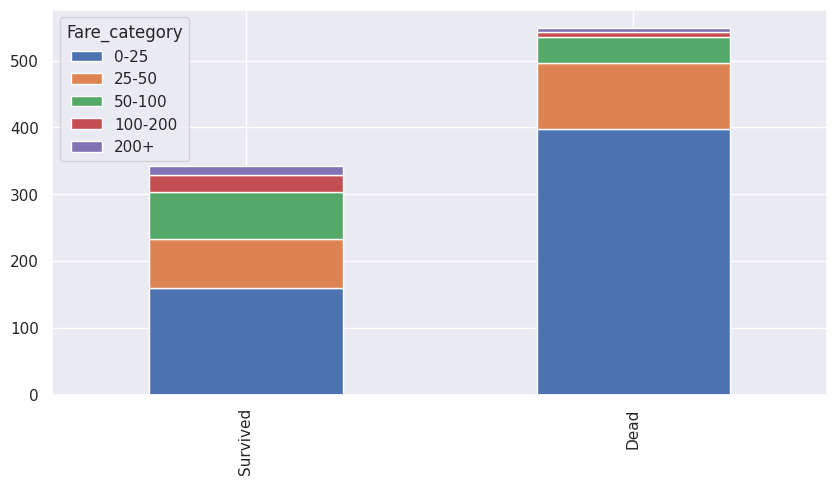

In [109]:
bar_char("Fare_category")

1. Según Wikipedia, se calcula que había 2.224 pasajeros y tripulantes a bordo del Titanic cuando se hundió. ¿De cuántos de ellos tenemos información en este conjunto de datos? De las personas de las que tenemos datos, ¿cuántas sobrevivieron y cuántas no? ¿Cuál es la tasa global de supervivencia?

In [110]:
# Número total de registros en el dataset
total_pasajeros = len(df)

# Número de supervivientes y no supervivientes
sobrevivientes = df['Survived'].sum()
no_sobrevivientes = total_pasajeros - sobrevivientes

# Tasa global de supervivencia
tasa_supervivencia = df['Survived'].mean() * 100

print(f"Tenemos informacion de {total_pasajeros} pasajeros, sobrevivieron {sobrevivientes} y no sobrevivieron {no_sobrevivientes}, la tasa de supervivencia es de {tasa_supervivencia:.2f}")

Tenemos informacion de 891 pasajeros, sobrevivieron 342 y no sobrevivieron 549, la tasa de supervivencia es de 38.38


2. ¿Cuántos pasajeros del Titanic eran hombres y cuántos mujeres? ¿Qué se obtiene cuando se desglosa por clase de billete?

In [111]:
# Número total de hombres y mujeres
df['Sex'].value_counts()

# Desglose por clase de billete y sexo
df.groupby(['Pclass', 'Sex']).size().unstack()

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [112]:
# Conteo total de hombres y mujeres
num_hombres = (df['Sex'] == 'male').sum()
num_mujeres = (df['Sex'] == 'female').sum()

print(f"Había un total de {num_hombres} hombres y {num_mujeres} mujeres a bordo. La mayoria de personas tanto de sexo femenino como masculino iban en la clase 3.")

Había un total de 577 hombres y 314 mujeres a bordo. La mayoria de personas tanto de sexo femenino como masculino iban en la clase 3.


3. ¿Cuántos pasajeros de cada sexo sobrevivieron y cuántos no? ¿Cuál es la tasa de supervivencia de los pasajeros de cada sexo?

In [113]:
# Cantidad de hombres y mujeres que sobrevivieron y no sobrevivieron
sobrevivientes_sexo = df.groupby('Sex')['Survived'].sum()
no_sobrevivientes_sexo = df.groupby('Sex')['Survived'].count() - sobrevivientes_sexo

tasa_sexo = df.groupby('Sex')['Survived'].mean() * 100
# Tasa de supervivencia por sexo

print(f"De las {df['Sex'].value_counts()['female']} mujeres, sobrevivieron {int(sobrevivientes_sexo['female'])} "
      f"({tasa_sexo['female']:.1f}%).")
print(f"De los {df['Sex'].value_counts()['male']} hombres, sobrevivieron {int(sobrevivientes_sexo['male'])} "
      f"({tasa_sexo['male']:.1f}%).")

print(f"Conclusión: la tasa de supervivencia de las mujeres fue mucho mayor que la de los hombres.")

De las 314 mujeres, sobrevivieron 233 (74.2%).
De los 577 hombres, sobrevivieron 109 (18.9%).
Conclusión: la tasa de supervivencia de las mujeres fue mucho mayor que la de los hombres.


4. ¿De cuántos pasajeros tenemos información sobre la edad (incluida la edad estimada)? ¿Para cuántos falta información sobre la edad? ¿Cuál es la distribución por edades de los pasajeros sobre los que se dispone de información?

In [114]:
total_con_edad = df['Age'].notna().sum()
total_sin_edad = df['Age'].isna().sum()

print(f"Tenemos información de edad para {total_con_edad} pasajeros y faltan {total_sin_edad}.")
print(f"La edad media es de {df['Age'].mean():.1f} años, con un mínimo de {df['Age'].min()} y un máximo de {df['Age'].max()}.")


Tenemos información de edad para 891 pasajeros y faltan 0.
La edad media es de 29.8 años, con un mínimo de 0.42 y un máximo de 80.0.


5. Muestre la distribución de edad por clase de billete, por sexo. ¿Qué encuentra?


Los pasajeros de primera clase eran, en promedio, mayores que los de segunda y tercera clase. El rango intercuartílico se centra alrededor de los 30–40 años en primera, mientras que baja a unos 25–35 años en tercera.


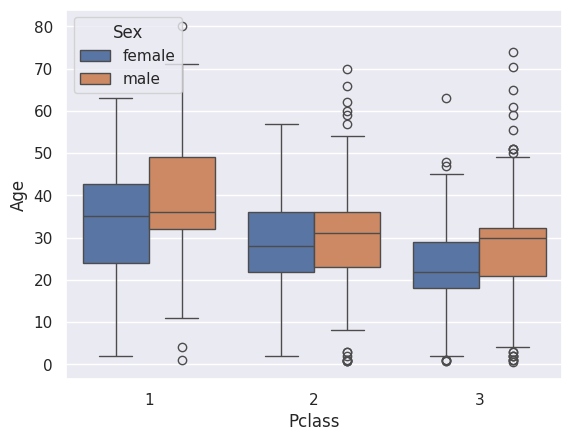

In [115]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
print("Los pasajeros de primera clase eran, en promedio, mayores que los de segunda y tercera clase. El rango intercuartílico se centra alrededor de los 30–40 años en primera, mientras que baja a unos 25–35 años en tercera.")

6. ¿Cómo afectan el sexo, la clase de billete y la edad de un pasajero a sus posibilidades de sobrevivir? Intenta utilizar un único gráfico para responder a esta pregunta.

/tmp/ipython-input-991575481.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


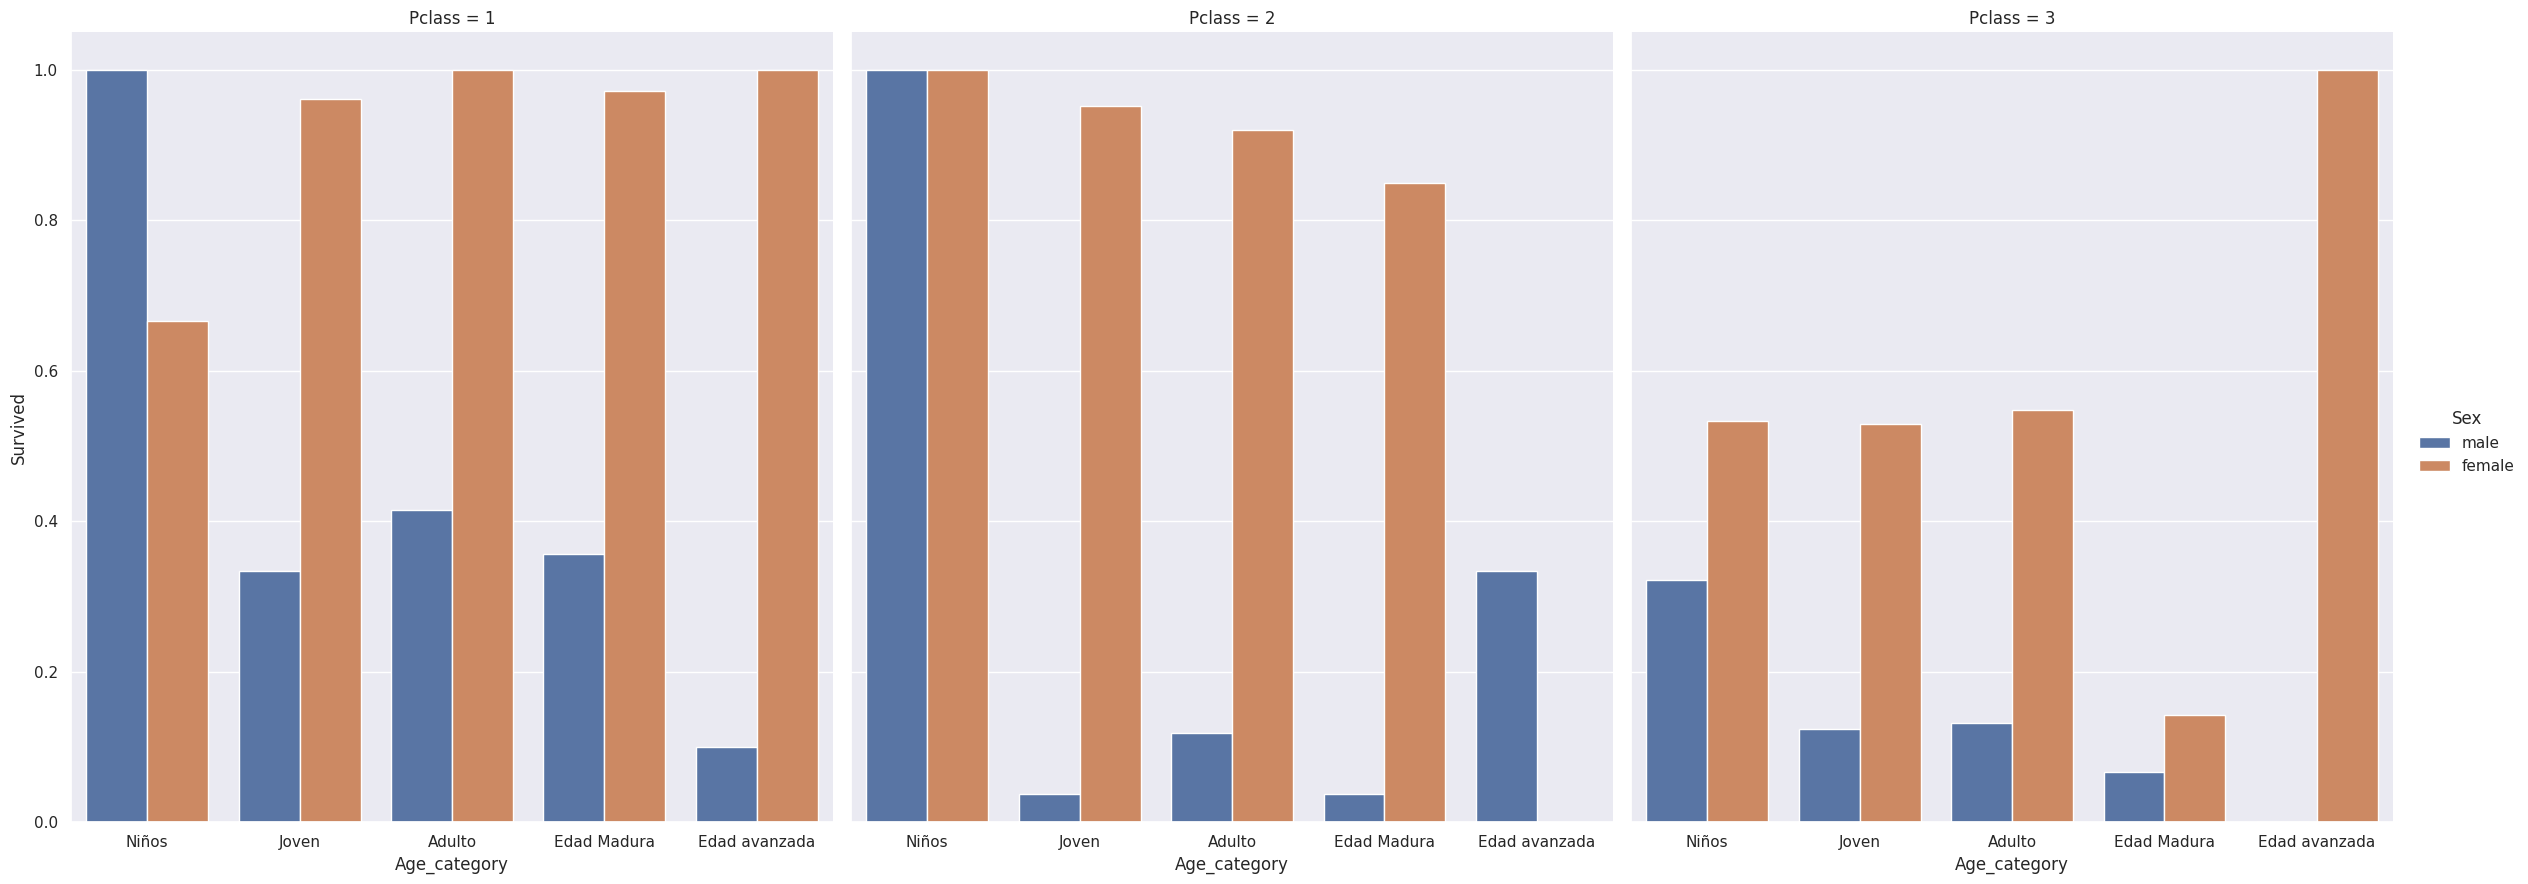

In [129]:
sns.catplot(
    data=df, x='Age_category', y='Survived',
    hue='Sex', col='Pclass',
    kind='bar', height=9, aspect=0.9,
    ci=None
)
print("")

7. Indique la distribución del número de miembros de la familia (incluidos hermanos, cónyuges, padres e hijos) que acompañaban a cada pasajero. ¿La mayoría de los pasajeros viajaban solos o con familia?

537 pasajeros viajaban solos y 354 viajaban con familiares.


<Axes: xlabel='FamilySize', ylabel='count'>

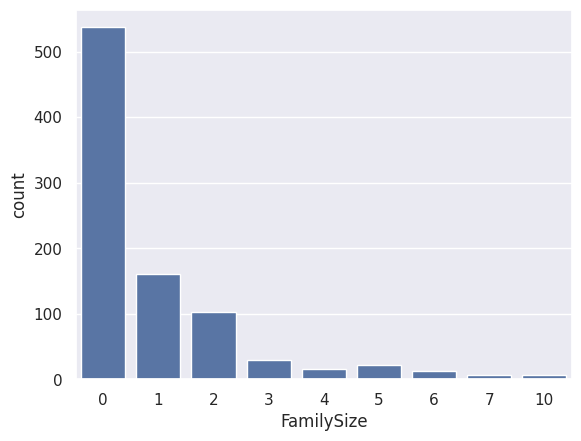

In [117]:
df['FamilySize'] = df['SibSp'] + df['Parch']

viajan_solos = (df['FamilySize'] == 0).sum()
viajan_con_familia = (df['FamilySize'] > 0).sum()

print(f"{viajan_solos} pasajeros viajaban solos y {viajan_con_familia} viajaban con familiares.")

# Gráfico:
sns.countplot(x='FamilySize', data=df)


8. ¿En qué clase de billete viajaron la mayoría de las familias numerosas? ¿Y qué clase de billete tiene la menor proporción de pasajeras que viajaron solas de entre todas las pasajeras de esa clase?

In [118]:
# Familias numerosas (>= 3)
familias_numerosas = df[df['FamilySize'] >= 3]['Pclass'].value_counts()

# Proporción de pasajeras solas por clase
solo_women = df[(df['Sex'] == 'female') & (df['FamilySize'] == 0)]
proporcion_solas = (solo_women['Pclass'].value_counts() /
                    df[df['Sex'] == 'female']['Pclass'].value_counts()) * 100

clase_familias = familias_numerosas.idxmax()
clase_menor_solas = proporcion_solas.idxmin()

print(f"La mayoría de las familias numerosas viajaban en clase {clase_familias}.")
print(f"La clase {clase_menor_solas} tiene la menor proporción de pasajeras que viajaron solas.")



La mayoría de las familias numerosas viajaban en clase 3.
La clase 1 tiene la menor proporción de pasajeras que viajaron solas.


9. En este conjunto de datos, la variable Tarifa no representa la tarifa por persona. En cambio, cada número de billete tiene una tarifa correspondiente, y algunos pasajeros comparten un único número de billete. Por lo tanto, la variable Tarifa es la tarifa total de un grupo de pasajeros que comparten el mismo número de billete. Sabiendo esto, calcule la tarifa media por persona. No es necesario que muestres una tabla o una cifra para esta pregunta, sólo muestra el código para el cálculo.

In [120]:
# Calcular cuántas personas comparten cada número de billete
ticket_counts = df['Ticket'].value_counts()

# Crear una nueva columna con el número de pasajeros por billete
df['TicketCount'] = df['Ticket'].map(ticket_counts)

# Calcular la tarifa por persona dividiendo la tarifa total entre el número de personas por billete
df['FarePerPerson'] = df['Fare'] / df['TicketCount']

# Calcular la tarifa media por persona
media_tarifa_persona = df['FarePerPerson'].mean()

print(f"La tarifa media por persona (ajustada por billete compartido) es de {media_tarifa_persona:.2f} unidades monetarias.")
print("Conclusión: este valor representa el coste promedio por pasajero, corrigiendo que algunos compartían el mismo billete.")

La tarifa media por persona (ajustada por billete compartido) es de 17.79 unidades monetarias.
Conclusión: este valor representa el coste promedio por pasajero, corrigiendo que algunos compartían el mismo billete.


10. ¿Cuál es la distribución de la tarifa por billete para cada clase de billete?


Conclusión: la tarifa aumenta claramente con la clase del billete; la primera clase presenta tarifas más altas y mayor variabilidad.


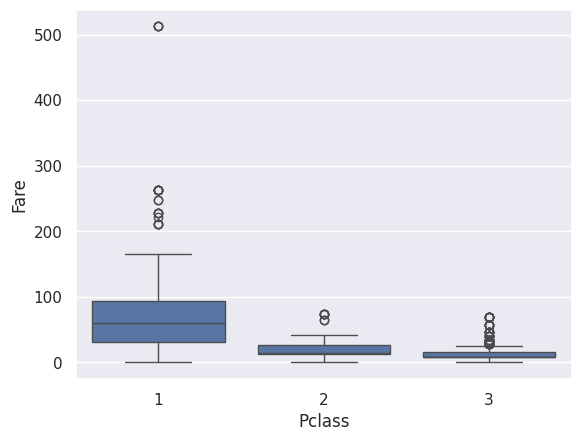

In [130]:
sns.boxplot(x='Pclass', y='Fare', data=df)

print("Conclusión: la tarifa aumenta claramente con la clase del billete; "
      "la primera clase presenta tarifas más altas y mayor variabilidad.")